In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [53]:
# !pip install twitterscraper
# !pip install vaderSentiment
# !pip install langdetect

In [2]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


In [3]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
# from google.colab import drive
# drive.mount('/gdrive/')
# %cd /gdrive/My Drive/Morgan Stanley Project/Data and Notebook/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)

In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [54]:
df = pd.read_json('pretty_ms_tweets.json')

In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [10]:
analyzer = SentimentIntensityAnalyzer()

In [11]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [12]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [13]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [14]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

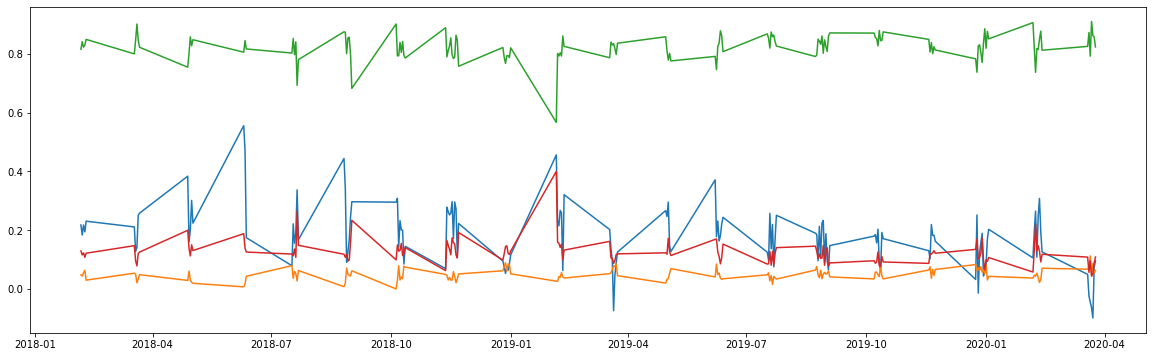

In [15]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [16]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'Las calificadoras que decían que con peña nieto estábamos de maravilla? Obvio no era por las millonadas que les mandaba verdad?'

In [17]:
Filter = df['text'].apply(lambda x: 'morganstanley' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Soo did @MorganStanley Employees participate in this huge College scandal???...WOW. Lost all respect for the company. if they participated in the college scam,  Only God know what else they are doing with People money. Smdh '

Text(0, 0.5, 'Sentiment')

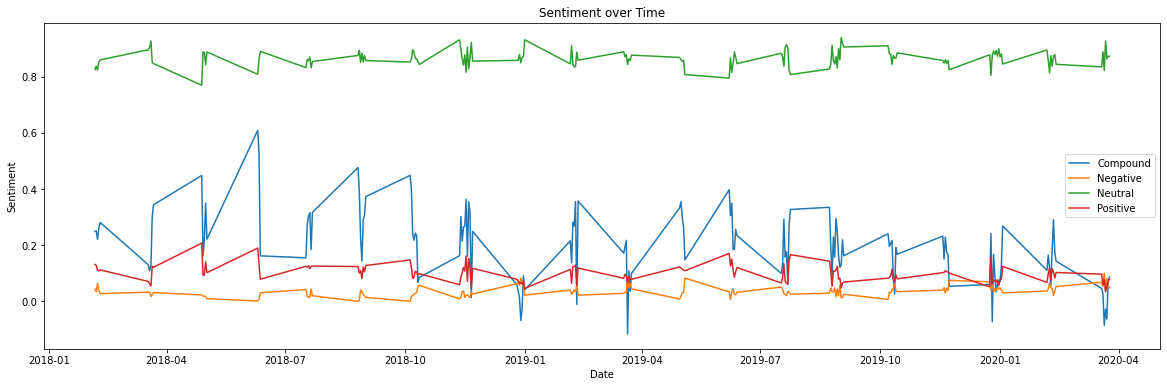

In [18]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

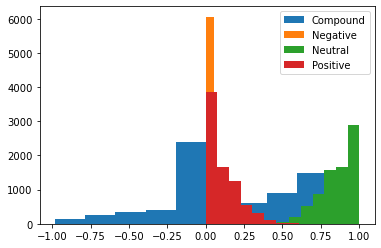

In [19]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

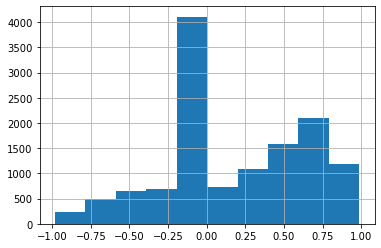

In [20]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [21]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.887,0.000,-0.3736
1,0.676,0.189,0.3324
2,0.732,0.000,-0.2960
3,1.000,0.000,0.0000
4,0.799,0.000,-0.6996
...,...,...,...
12851,0.513,0.000,-0.2263
12852,1.000,0.000,0.0000
12853,0.799,0.041,-0.6310
12854,1.000,0.000,0.0000


In [27]:
#Importing Various twitter data
#Merril Lynch
df_ml = pd.read_json('pretty_ml_tweets.json')

#Goldman Sachs
df_gs = pd.read_json('pretty_gs_tweets.json')

#Morgan Stanley
df_ms = pd.read_json('pretty_ms_tweets.json')

#JP Morgan and Chase
df_jp = pd.read_json('pretty_jp_tweets.json')

#Wealth Management
df_wm = pd.read_json('wm_tweets.json')

In [28]:
df_all = pd.concat([df_ml,df_gs,df_ms,df_jp,df_wm])

In [29]:
df_all.count()

has_media           69079
hashtags            69079
img_urls            69079
is_replied          69079
is_reply_to         69079
likes               69079
links               69079
parent_tweet_id     69079
replies             69079
reply_to_users      69079
retweets            69079
screen_name         69079
text                69079
text_html           69079
timestamp           69079
timestamp_epochs    69079
tweet_id            69079
tweet_url           69079
user_id             69079
username            69079
video_url           69079
dtype: int64

In [30]:
#LDAVIS
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [31]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [32]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(12856, 2687)


In [33]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [34]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df_all['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [35]:
sentiment_wm = df_wm['text'].apply(lambda x: analyzer.polarity_scores(x))
df_wm = pd.concat([df_wm, sentiment_wm.apply(pd.Series)],1)

In [36]:
df_wm.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,"[Bank, blockchain, Finance, FinancialTechnolog...",[https://pbs.twimg.com/media/EYLWLDNWkAEevPD.jpg],False,False,2,[https://blog.iammarketingmedia.com/stg-to-acq...,,0,[],...,2020-05-16 23:50:47,1261806333147439104,/IAM__Network/status/1261806333147439106,226310002,IAM Platform,,0.000,1.000,0.000,0.0000
1,True,"[financialgudiance, financialstrategy, financi...",[https://pbs.twimg.com/media/EYLKzsXUcAAvm_I.jpg],False,False,0,[],,0,[],...,2020-05-16 23:01:08,1261793835912327168,/DuisThrivent/status/1261793835912327168,1179406874275438592,Connor Duis,,0.115,0.885,0.000,-0.3252
2,False,"[taxreturn, covid, workfrom, financialplanning...",[],False,False,0,[https://socialcentre.td.com/tO2Uv4],,0,[],...,2020-05-16 22:30:01,1261786006975590400,/LinaYoukam_TD/status/1261786006975590401,184167921,Lina Youkam,,0.000,1.000,0.000,0.0000
3,False,"[Bank, blockchain, Finance, FinancialTechnolog...",[],False,False,0,[https://blog.iammarketingmedia.com/more-remot...,,0,[],...,2020-05-16 22:20:04,1261783503190085632,/IAM__Network/status/1261783503190085633,226310002,IAM Platform,,0.000,0.863,0.137,0.6249
4,False,"[financialplanning, wealthmanagement, tampa, g...",[],False,False,1,[https://certificates.cfp.net/f597fc90-0192-4c...,,0,[],...,2020-05-16 21:47:47,1261775378424700928,/_tonyrome/status/1261775378424700928,1114247487269888000,"Tony Rome, CFP®",,0.048,0.952,0.000,-0.0516


In [37]:
df_wm_pos = df_wm[df_wm['compound'] >= 0.05]
df_wm_neg = df_wm[df_wm['compound'] <= -0.05]
df_wm_neu = df_wm[( df_wm['compound'] < 0.05 ) & ( df_wm['compound'] > -0.05 )]


In [38]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_wm_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.066210 -0.058919       1        1  15.098370
3     -0.035517 -0.048088       2        1  12.512556
7     -0.005786 -0.047102       3        1  11.251603
2     -0.076780  0.078427       4        1  11.171248
4      0.131955 -0.033376       5        1  10.715071
5      0.075382 -0.041963       6        1   8.986287
1     -0.156031  0.016124       7        1   8.126005
6     -0.134145 -0.134901       8        1   7.930285
9     -0.032564  0.226191       9        1   7.400654
8      0.167276  0.043608      10        1   6.807920, topic_info=            Term        Freq       Total Category  logprob  loglift
940         hubs   81.000000   81.000000  Default  30.0000  30.0000
1647  retirement  136.000000  136.000000  Default  29.0000  29.0000
1008   instagram   50.000000   50.000000  Default  28.0000  28.0000
959       igshid   47.000000   47.000000  Default  27.0000  27.0000
150         bank   52.000000   52.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1199  management   13.315335  188.749147  Topic10  -4.9719   0.0356
1934  technology    9.979316   60.610341  Topic10  -5.2603   0.8831
2163         www   11.688955  187.138065  Topic10  -5.1021  -0.0861
1320         new   10.472276  100.872659  Topic10  -5.2120   0.4220
728    financial   10.620003  179.434641  Topic10  -5.1980  -0.1400

[687 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
8         5  0.075329  accounts
8         7  0.225988  accounts
8        10  0.677964  accounts
13        1  0.893233  acquired
17        3  0.798542       act
...     ...       ...       ...
2166      5  0.237332      year
2166      6  0.047466      year
2166      7  0.047466      year
2166      8  0.015822      year
2166     10  0.031644      year

[1622 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 8, 3, 5, 6, 2, 7, 10, 9])

In [39]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_wm_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.010727  0.103039       1        1  13.403460
4     -0.052373  0.101291       2        1  12.302469
5     -0.016987  0.109541       3        1  11.424007
3     -0.125091  0.012750       4        1  10.678553
6     -0.031580 -0.119460       5        1   9.071474
8      0.074106  0.075386       6        1   9.043677
7      0.220010 -0.068756       7        1   8.993323
0     -0.140183 -0.151024       8        1   8.933614
1     -0.001075  0.003191       9        1   8.271133
2      0.083898 -0.065958      10        1   7.878290, topic_info=                  Term       Freq      Total Category  logprob  loglift
171             invest  18.000000  18.000000  Default  30.0000  30.0000
74                 die  13.000000  13.000000  Default  29.0000  29.0000
71                debt  26.000000  26.000000  Default  28.0000  28.0000
108  financialadvisers  22.000000  22.000000  Default  27.0000  27.0000
199            logical  11.000000  11.000000  Default  26.0000  26.0000
..                 ...        ...        ...      ...      ...      ...
359             wealth   3.778776  27.313489  Topic10  -4.3488   0.5631
283         retirement   3.932926  40.890678  Topic10  -4.3088   0.1995
151              https   4.472809  82.173182  Topic10  -4.1802  -0.3698
362         wealthtech   2.984465  16.931761  Topic10  -4.5848   0.8053
172          investing   2.794968  38.512122  Topic10  -4.6504  -0.0821

[467 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         2  0.160868   advice
1         3  0.643473   advice
1         6  0.080434   advice
2         1  0.188770  adviser
2         8  0.566311  adviser
...     ...       ...      ...
376       2  0.412922     year
376       5  0.165169     year
376       7  0.247753     year
377       1  0.650993    years
377       2  0.162748    years

[999 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 6, 4, 7, 9, 8, 1, 2, 3])

In [40]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_wm_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.072246  0.030323       1        1  14.686624
2      0.062230 -0.124247       2        1  12.779964
8      0.151570 -0.056873       3        1  10.837037
3      0.112247 -0.057544       4        1   9.921282
0     -0.013674  0.066941       5        1   9.756307
6     -0.226860 -0.208225       6        1   8.988438
9      0.123148  0.059780       7        1   8.783846
1     -0.085238  0.151196       8        1   8.516287
7     -0.046243  0.005252       9        1   8.089876
5     -0.149426  0.133398      10        1   7.640339, topic_info=                   Term       Freq       Total Category  logprob  loglift
693              status  92.000000   92.000000  Default  30.0000  30.0000
440                lnkd  86.000000   86.000000  Default  29.0000  29.0000
242   financialadvisers  47.000000   47.000000  Default  28.0000  28.0000
509                 mxn  41.000000   41.000000  Default  27.0000  27.0000
80                 buff  82.000000   82.000000  Default  26.0000  26.0000
..                  ...        ...         ...      ...      ...      ...
465              market   9.101084   58.976666  Topic10  -4.4751   0.7030
557                 pic  10.126970  163.050799  Topic10  -4.3683  -0.2071
749              update   7.467750   31.901263  Topic10  -4.6729   1.1197
625  retirementplanning   7.708496   52.630012  Topic10  -4.6412   0.6508
377           investing   7.527619  103.251124  Topic10  -4.6649  -0.0469

[540 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5         4  0.074418  acquisition
5         7  0.223253  acquisition
5         9  0.669759  acquisition
7         1  0.102384       action
7         8  0.819069       action
...     ...       ...          ...
802       3  0.386436         zurl
802       4  0.386436         zurl
802       5  0.055205         zurl
802       7  0.055205         zurl
802       9  0.055205         zurl

[1037 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 9, 4, 1, 7, 10, 2, 8, 6])

In [41]:
print(df_wm_pos.shape)
print(df_wm_neg.shape)
print(df_wm_neu.shape)

(8780, 25)
(1422, 25)
(4046, 25)


In [42]:
sentiment_gs = df_gs['text'].apply(lambda x: analyzer.polarity_scores(x))
df_gs = pd.concat([df_gs, sentiment_gs.apply(pd.Series)],1)

df_gs_pos = df_gs[df_gs['compound'] >= 0.05]
df_gs_neg = df_gs[df_gs['compound'] <= -0.05]
df_gs_neu = df_gs[( df_gs['compound'] < 0.05 ) & ( df_gs['compound'] > -0.05 )]

In [43]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_gs_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.051557 -0.006611       1        1  12.858793
1      0.026754 -0.048164       2        1  11.272936
8     -0.109816 -0.038393       3        1  11.106889
6     -0.022709  0.028294       4        1  10.199074
0     -0.145502 -0.082889       5        1  10.135121
2     -0.070280  0.142172       6        1   9.929929
5     -0.042618  0.099059       7        1   9.803636
7      0.167382  0.089734       8        1   9.425580
3      0.154890  0.026509       9        1   8.371001
4      0.093455 -0.209712      10        1   6.897041, topic_info=        Term       Freq       Total Category  logprob  loglift
463    group  71.000000   71.000000  Default  30.0000  30.0000
122   brexit  37.000000   37.000000  Default  29.0000  29.0000
264     deal  31.000000   31.000000  Default  28.0000  28.0000
867   rating  34.000000   34.000000  Default  27.0000  27.0000
964   shares  45.000000   45.000000  Default  26.0000  26.0000
...      ...        ...         ...      ...      ...      ...
508     http   8.603723  123.595290  Topic10  -4.6207   0.0093
964   shares   7.291692   45.677771  Topic10  -4.7861   0.8392
610     like   7.422772   73.279402  Topic10  -4.7683   0.3844
294     dlvr   6.655875   27.433864  Topic10  -4.8773   1.2578
1074   think   6.441005   28.413424  Topic10  -4.9102   1.1899

[576 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         7  0.960439       abu
5         1  0.865609   account
5         6  0.173122   account
6         1  0.848611  accounts
7         7  0.780858  acquires
...     ...       ...       ...
1199      6  0.802556      york
1202      4  0.229191   youtube
1202      9  0.572978   youtube
1202     10  0.171893   youtube
1204      9  0.966027       zpr

[1225 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 9, 7, 1, 3, 6, 8, 4, 5])

In [44]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_gs_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.062721 -0.225189       1        1  12.500291
0      0.060187  0.053366       2        1  10.866963
8     -0.383814 -0.032514       3        1  10.806391
6      0.067749 -0.095498       4        1  10.504858
1      0.067260 -0.014789       5        1  10.427959
7      0.061216  0.000947       6        1  10.194303
4     -0.003550  0.092663       7        1   9.460063
9      0.011694  0.175497       8        1   9.327804
5      0.012071 -0.064580       9        1   8.079902
2      0.044466  0.110096      10        1   7.831465, topic_info=             Term       Freq       Total Category  logprob  loglift
226           die  63.000000   63.000000  Default  30.0000  30.0000
39            auf  41.000000   41.000000  Default  29.0000  29.0000
631           que  37.000000   37.000000  Default  28.0000  28.0000
479          look  36.000000   36.000000  Default  27.0000  27.0000
244           dpa  30.000000   30.000000  Default  26.0000  26.0000
..            ...        ...         ...      ...      ...      ...
154           com  13.022687  140.069784  Topic10  -3.9577   0.1716
399         https  12.214731  118.879407  Topic10  -4.0217   0.2716
801       twitter   9.383993   95.639107  Topic10  -4.2854   0.2254
863           www   6.698192   70.920232  Topic10  -4.6225   0.1873
351  goldmansachs   5.931286   76.967506  Topic10  -4.7441  -0.0161

[515 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         8  0.867661   absence
2         2  0.963462       abu
11        8  0.935796    admits
12        4  0.647258  advising
14        3  0.960941       afx
...     ...       ...       ...
871       5  0.656085   youtube
871       6  0.164021   youtube
871       7  0.164021   youtube
876       3  0.966861      ziel
877       7  0.915588       zpr

[901 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 9, 7, 2, 8, 5, 10, 6, 3])

In [45]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_gs_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.205145  0.283353       1        1  13.075949
4     -0.306831  0.129313       2        1  11.136579
2     -0.042231 -0.076102       3        1  10.900808
5     -0.105020  0.053006       4        1   9.786910
8     -0.014987  0.018266       5        1   9.775109
3      0.063439 -0.079248       6        1   9.748794
9      0.092267 -0.115662       7        1   9.308041
0     -0.006451 -0.186884       8        1   8.958315
7      0.061432  0.006783       9        1   8.743758
1      0.053238 -0.032826      10        1   8.565738, topic_info=          Term        Freq       Total Category  logprob  loglift
94     bitcoin  199.000000  199.000000  Default  30.0000  30.0000
655       open  156.000000  156.000000  Default  29.0000  29.0000
658  operation  154.000000  154.000000  Default  28.0000  28.0000
414      group  149.000000  149.000000  Default  27.0000  27.0000
937    trading  170.000000  170.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
850     social    9.773388   18.453690  Topic10  -4.8305   1.8218
141        ceo   12.747965   64.510933  Topic10  -4.5648   0.8359
448       http   17.213893  279.757814  Topic10  -4.2644  -0.3308
947    twitter   14.390254  297.385606  Topic10  -4.4436  -0.5711
697        pic   10.280634  205.179974  Topic10  -4.7799  -0.5362

[542 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         7  0.937564         abu
4         7  0.907760  activebeta
9         3  0.949162     adviser
14        8  0.865770      airbus
17        6  0.893008      alerta
...     ...       ...         ...
1017     10  0.823944       youtu
1018      3  0.131167     youtube
1018     10  0.852584     youtube
1022      2  0.948743      zolmax
1023      2  0.988043         zpr

[879 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 3, 6, 9, 4, 10, 1, 8, 2])

In [46]:
print(df_gs_pos.shape)
print(df_gs_neg.shape)
print(df_gs_neu.shape)

(4457, 25)
(3146, 25)
(6253, 25)


In [47]:
sentiment_ms = df_ms['text'].apply(lambda x: analyzer.polarity_scores(x))
df_ms = pd.concat([df_ms, sentiment_ms.apply(pd.Series)],1)

df_ms_pos = df_ms[df_ms['compound'] >= 0.05]
df_ms_neg = df_ms[df_ms['compound'] <= -0.05]
df_ms_neu = df_ms[( df_ms['compound'] < 0.05 ) & ( df_ms['compound'] > -0.05 )]

In [48]:
print(df_ms_pos.shape)
print(df_ms_neg.shape)
print(df_ms_neu.shape)

(6531, 25)
(2400, 25)
(3925, 25)


In [49]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_ms_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.070854 -0.095053       1        1  16.935359
3     -0.060144 -0.100166       2        1  12.830244
5     -0.056301 -0.098861       3        1  11.665646
0      0.180067 -0.038318       4        1  10.966440
7     -0.035467 -0.071827       5        1   9.071488
6     -0.039277 -0.083013       6        1   8.773781
1     -0.025247 -0.027711       7        1   8.457044
8     -0.000338  0.076568       8        1   7.553775
2     -0.198123  0.301530       9        1   7.455641
4      0.305684  0.136850      10        1   6.290583, topic_info=              Term        Freq       Total Category  logprob  loglift
35           alexa  101.000000  101.000000  Default  30.0000  30.0000
74             ask   75.000000   75.000000  Default  29.0000  29.0000
1495          wine  109.000000  109.000000  Default  28.0000  28.0000
4           access   71.000000   71.000000  Default  27.0000  27.0000
1152      reserved  127.000000  127.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1422           ubs    5.837685   16.085943  Topic10  -5.3368   1.7525
747       jpmorgan    7.840783   33.045700  Topic10  -5.0418   1.3276
299   creditsuisse    6.280153   19.292458  Topic10  -5.2637   1.6438
220           citi    6.181395   20.253342  Topic10  -5.2796   1.5793
577   goldmansachs    6.978422   40.542151  Topic10  -5.1583   1.0066

[564 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
4         4  0.028047        access
4        10  0.953611        access
10        8  0.909183     achieving
15        2  0.791840          adam
21        1  0.118726        advice
...     ...       ...           ...
1527      1  0.291134  yahoofinance
1527     10  0.582269  yahoofinance
1531      3  0.175188           yes
1531      6  0.105113           yes
1531      8  0.665715           yes

[1157 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 6, 1, 8, 7, 2, 9, 3, 5])

In [50]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_ms_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.093890  0.056390       1        1  12.547310
2      0.034891 -0.023596       2        1  12.029649
8     -0.059478  0.052054       3        1  11.994761
4      0.344168  0.088298       4        1  11.635103
3     -0.061151 -0.030118       5        1  10.018877
7     -0.076892  0.106772       6        1   9.383934
5     -0.057567  0.083717       7        1   9.344460
6     -0.116551 -0.017636       8        1   9.125260
9      0.036464 -0.277119       9        1   7.293478
1      0.050006 -0.038762      10        1   6.627168, topic_info=              Term       Freq      Total Category  logprob  loglift
497            que  31.000000  31.000000  Default  30.0000  30.0000
421         morgan  51.000000  51.000000  Default  29.0000  29.0000
581        stanley  49.000000  49.000000  Default  28.0000  28.0000
510      recession  24.000000  24.000000  Default  27.0000  27.0000
51   bankofamerica  23.000000  23.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
298          https   9.605021  73.943358  Topic10  -3.7431   0.6730
691            www   7.211397  44.883417  Topic10  -4.0297   0.8856
338       jpmorgan   5.649394  26.301544  Topic10  -4.2738   1.1759
640        twitter   8.451419  96.930855  Topic10  -3.8710   0.2743
103           citi   4.235057  27.362464  Topic10  -4.5620   0.8482

[502 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.844143        acc
1         2  0.414039  according
1        10  0.414039  according
2         1  0.601695    account
2         3  0.150424    account
...     ...       ...        ...
698       3  0.691261      young
698       8  0.345631      young
699       4  0.136490    youtube
699       8  0.136490    youtube
699      10  0.682449    youtube

[985 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 9, 5, 4, 8, 6, 7, 10, 2])

In [51]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_ms_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/nishitalamba/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.096422  0.125970       1        1  13.181071
1      0.091664 -0.030116       2        1  12.024425
7      0.202757  0.011981       3        1  11.969222
8     -0.107228 -0.190944       4        1  10.495623
9      0.034691  0.123095       5        1   9.896983
2     -0.134116  0.042998       6        1   9.481011
0     -0.012274  0.020479       7        1   9.093512
5     -0.051014  0.138616       8        1   8.738137
6     -0.229057 -0.008040       9        1   7.582735
3      0.108154 -0.234038      10        1   7.537282, topic_info=        Term        Freq       Total Category  logprob  loglift
559   status  101.000000  101.000000  Default  30.0000  30.0000
460      pic  164.000000  164.000000  Default  29.0000  29.0000
408   morgan   90.000000   90.000000  Default  28.0000  28.0000
555  stanley   86.000000   86.000000  Default  27.0000  27.0000
611  twitter  258.000000  258.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
108  climate    6.001933    7.887595  Topic10  -4.5898   2.3121
286    https   15.083364  179.835934  Topic10  -3.6683   0.1069
611  twitter   16.668595  258.038435  Topic10  -3.5684  -0.1543
118      com   15.099297  289.681443  Topic10  -3.6673  -0.3688
90    change    6.061811   12.429593  Topic10  -4.5799   1.8672

[468 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         7  0.865916        acc
1         1  0.111205  according
1         5  0.778438  according
2         7  0.227122    account
2         9  0.681365    account
...     ...       ...        ...
651       2  0.130704       york
652       3  0.624241      youtu
652       6  0.234090      youtu
652       9  0.156060      youtu
653       9  0.871972    youtube

[704 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 8, 9, 10, 3, 1, 6, 7, 4])